In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

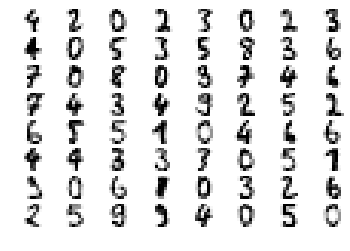

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.55435 stdev: 0.27676
Best fitness: 0.91156 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.466
Mean genetic distance 2.853, standard deviation 0.483
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.736 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.74737 stdev: 0.20545
Best fitness: 0.94682 - size: (3, 15) - species 3 - id 271
Average adjusted fitness: 0.668
Mean genetic distance 3.003, standard deviation 0.480
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 12.615 sec (11.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77261 stdev: 0.19862
Best fitness: 0.94805 - size: (4, 16) - species 25 - id 451
Average adjusted fitness: 0.661
Mean genetic distance 3.032, standard deviation 0.480
Population of 201 members in 33 speci

Mean genetic distance 3.062, standard deviation 0.487
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 17.404 sec (16.071 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.53795 stdev: 0.20867
Best fitness: 0.84972 - size: (2, 13) - species 7 - id 96
Average adjusted fitness: 0.348
Mean genetic distance 2.902, standard deviation 0.465
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 14.141 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67098 stdev: 0.18962
Best fitness: 0.84972 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.430
Mean genetic distance 2.963, standard deviation 0.456
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 15.171 sec (14.656 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72009 stdev: 0.15325
Best fitness: 0.85529 - 

Population's average fitness: 0.60090 stdev: 0.09634
Best fitness: 0.76438 - size: (3, 16) - species 27 - id 955
Average adjusted fitness: 0.279
Mean genetic distance 3.119, standard deviation 0.494
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 17.638 sec (16.282 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.57021 stdev: 0.21937
Best fitness: 0.90105 - size: (2, 13) - species 2 - id 17
Average adjusted fitness: 0.431
Mean genetic distance 2.934, standard deviation 0.473
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.70022 stdev: 0.17324
Best fitness: 0.92888 - size: (3, 14) - species 15 - id 269
Average adjusted fitness: 0.481
Mean genetic distance 2.962, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.103, standard deviation 0.472
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 15.753 sec (15.088 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61094 stdev: 0.09189
Best fitness: 0.79654 - size: (3, 13) - species 27 - id 826
Average adjusted fitness: 0.210
Mean genetic distance 3.138, standard deviation 0.465
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 16.516 sec (15.326 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54274 stdev: 0.14796
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.299
Mean genetic distance 2.801, standard deviation 0.478
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 13.506 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60787 stdev: 0.13724
Best fitness: 0.77242

Population's average fitness: 0.55828 stdev: 0.07207
Best fitness: 0.71552 - size: (3, 15) - species 29 - id 343
Average adjusted fitness: 0.247
Mean genetic distance 3.068, standard deviation 0.487
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 16.387 sec (15.201 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56539 stdev: 0.06923
Best fitness: 0.71552 - size: (3, 15) - species 29 - id 343
Average adjusted fitness: 0.202
Mean genetic distance 3.113, standard deviation 0.475
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 16.531 sec (15.422 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.56452 stdev: 0.20502
Best fitness: 0.86271 - size: (2, 13) - species 5 - id 154
Average adjusted fitness: 0.446
Mean genetic distance 2.843, standard deviation 0.498
Population of 201 members in 17 species
Total extinction

Mean genetic distance 3.083, standard deviation 0.497
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 15.333 sec (14.612 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59235 stdev: 0.09290
Best fitness: 0.76562 - size: (2, 13) - species 9 - id 131
Average adjusted fitness: 0.225
Mean genetic distance 3.106, standard deviation 0.506
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 16.270 sec (14.943 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60870 stdev: 0.08480
Best fitness: 0.76562 - size: (2, 13) - species 9 - id 131
Average adjusted fitness: 0.211
Mean genetic distance 3.167, standard deviation 0.510
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 15.908 sec (15.104 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53980 stdev: 0.14792
Best

Population's average fitness: 0.56318 stdev: 0.08126
Best fitness: 0.80767 - size: (3, 16) - species 26 - id 528
Average adjusted fitness: 0.206
Mean genetic distance 3.023, standard deviation 0.468
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 15.770 sec (14.657 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57921 stdev: 0.08039
Best fitness: 0.80767 - size: (3, 16) - species 26 - id 528
Average adjusted fitness: 0.206
Mean genetic distance 3.014, standard deviation 0.486
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 16.657 sec (15.057 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58352 stdev: 0.08005
Best fitness: 0.80767 - size: (3, 16) - species 26 - id 528
Average adjusted fitness: 0.226
Mean genetic distance 3.024, standard deviation 0.481
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 16.816 sec (15.350 average)
running

Mean genetic distance 2.920, standard deviation 0.484
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 14.981 sec (14.398 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56977 stdev: 0.08446
Best fitness: 0.79468 - size: (3, 16) - species 1 - id 466
Average adjusted fitness: 0.238
Mean genetic distance 3.036, standard deviation 0.508
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.231 sec (14.606 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57489 stdev: 0.08583
Best fitness: 0.79468 - size: (3, 16) - species 1 - id 466
Average adjusted fitness: 0.196
Mean genetic distance 3.075, standard deviation 0.490
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 16.273 sec (14.940 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58710 stdev: 0.08143
Best fitness: 0.79468 - size: (3, 16) - species 1 - id 466
Ave

Population's average fitness: 0.56545 stdev: 0.08889
Best fitness: 0.76500 - size: (3, 14) - species 6 - id 341
Average adjusted fitness: 0.221
Mean genetic distance 3.108, standard deviation 0.504
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 17.393 sec (15.674 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57552 stdev: 0.08754
Best fitness: 0.76500 - size: (3, 14) - species 6 - id 341
Average adjusted fitness: 0.241
Mean genetic distance 3.095, standard deviation 0.512
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 15.993 sec (15.753 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57493 stdev: 0.08930
Best fitness: 0.76500 - size: (3, 14) - species 6 - id 341
Average adjusted fitness: 0.236
Mean genetic distance 3.093, standard deviation 0.512
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 16.881 sec (15.979 average)

 ****** R

Mean genetic distance 3.058, standard deviation 0.538
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 16.617 sec (15.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57912 stdev: 0.08818
Best fitness: 0.77365 - size: (4, 17) - species 21 - id 506
Average adjusted fitness: 0.268
Mean genetic distance 3.132, standard deviation 0.523
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 16.959 sec (16.313 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59314 stdev: 0.07858
Best fitness: 0.77365 - size: (4, 17) - species 21 - id 506
Average adjusted fitness: 0.210
Mean genetic distance 3.160, standard deviation 0.504
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 17.247 sec (16.546 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59710 stdev: 0.08863
Best fitness: 0.77365 - size: (4, 17) - species 21 - id 506


Population's average fitness: 0.54283 stdev: 0.07383
Best fitness: 0.81756 - size: (2, 12) - species 2 - id 376
Average adjusted fitness: 0.166
Mean genetic distance 3.014, standard deviation 0.505
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 17.634 sec (16.708 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55100 stdev: 0.07715
Best fitness: 0.81756 - size: (2, 12) - species 2 - id 376
Average adjusted fitness: 0.277
Mean genetic distance 3.019, standard deviation 0.510
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 16.912 sec (16.776 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57304 stdev: 0.07538
Best fitness: 0.81756 - size: (2, 12) - species 2 - id 376
Average adjusted fitness: 0.186
Mean genetic distance 2.990, standard deviation 0.508
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 18.567 sec (17.224 average)

 ****** R

Mean genetic distance 2.887, standard deviation 0.498
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 15.729 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53433 stdev: 0.07445
Best fitness: 0.74521 - size: (3, 15) - species 15 - id 368
Average adjusted fitness: 0.246
Mean genetic distance 2.947, standard deviation 0.504
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 16.618 sec (16.173 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55128 stdev: 0.07652
Best fitness: 0.74521 - size: (3, 15) - species 15 - id 368
Average adjusted fitness: 0.272
Mean genetic distance 3.026, standard deviation 0.524
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.453 sec (16.600 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57054 stdev: 0.08553
Best fitness: 0.75263 - size: (3, 15) - species 16 - id 645
Average adjusted 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48303 stdev: 0.10023
Best fitness: 0.75696 - size: (2, 13) - species 2 - id 178
Average adjusted fitness: 0.205
Mean genetic distance 2.981, standard deviation 0.536
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.973 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53494 stdev: 0.09506
Best fitness: 0.79097 - size: (3, 16) - species 2 - id 362
Average adjusted fitness: 0.243
Mean genetic distance 3.049, standard deviation 0.536
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 17.033 sec (18.503 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56291 stdev: 0.10334
Best fitness: 0.79097 - size: (3, 16) - species 17 - id 362
Average adjusted fitness: 0.239
Mean genetic distance 3.036, standard deviation 0.493
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.359 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49628 stdev: 0.05837
Best fitness: 0.66172 - size: (2, 13) - species 6 - id 108
Average adjusted fitness: 0.191
Mean genetic distance 2.777, standard deviation 0.408
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 17.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53669 stdev: 0.06412
Best fitness: 0.73469 - size: (2, 14) - species 6 - id 353
Average adjusted fitness: 0.259
Mean genetic distance 2.854, standard deviation 0.440
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.944 sec (17.351 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53589 stdev: 0.07877
Best fitness: 0.74954 - size: (2, 13) - species 6 - id 532
Average adjusted fitness: 0.289
Mean genetic distance 2.876, standard deviation 0.453
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 17.374 sec (17.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.47527 stdev: 0.09836
Best fitness: 0.71985 - size: (2, 13) - species 1 - id 140
Average adjusted fitness: 0.218
Mean genetic distance 2.951, standard deviation 0.492
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 14.739 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53972 stdev: 0.09294
Best fitness: 0.76438 - size: (3, 14) - species 1 - id 353
Average adjusted fitness: 0.282
Mean genetic distance 3.082, standard deviation 0.531
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 15.752 sec (15.245 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56162 stdev: 0.09125
Best fitness: 0.77613 - size: (2, 14) - species 7 - id 510
Average adjusted fitness: 0.233
Mean genetic distance 3.144, standard deviation 0.520
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 16.304 sec (15.5

Population's average fitness: 0.46376 stdev: 0.09962
Best fitness: 0.67409 - size: (2, 13) - species 1 - id 44
Average adjusted fitness: 0.232
Mean genetic distance 2.907, standard deviation 0.439
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.586 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54189 stdev: 0.10055
Best fitness: 0.74212 - size: (3, 15) - species 17 - id 292
Average adjusted fitness: 0.268
Mean genetic distance 2.951, standard deviation 0.425
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 15.591 sec (15.089 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57865 stdev: 0.09979
Best fitness: 0.82560 - size: (2, 14) - species 14 - id 449
Average adjusted fitness: 0.256
Mean genetic distance 2.960, standard deviation 0.430
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 19.851 sec (16.676 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.47163 stdev: 0.14758
Best fitness: 0.75634 - size: (2, 13) - species 4 - id 27
Average adjusted fitness: 0.328
Mean genetic distance 2.914, standard deviation 0.485
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 16.136 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55370 stdev: 0.15146
Best fitness: 0.77860 - size: (2, 13) - species 4 - id 344
Average adjusted fitness: 0.311
Mean genetic distance 2.977, standard deviation 0.498
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 17.903 sec (17.019 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59466 stdev: 0.13927
Best fitness: 0.79468 - size: (2, 14) - species 7 - id 501
Average adjusted fitness: 0.280
Mean genetic distance 3.021, standard deviation 0.492
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.559 sec (17.19


Population's average fitness: 0.51778 stdev: 0.09321
Best fitness: 0.75448 - size: (2, 13) - species 3 - id 126
Average adjusted fitness: 0.244
Mean genetic distance 2.909, standard deviation 0.476
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.615 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57231 stdev: 0.09383
Best fitness: 0.75448 - size: (2, 13) - species 3 - id 126
Average adjusted fitness: 0.304
Mean genetic distance 3.013, standard deviation 0.472
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 15.786 sec (15.200 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58493 stdev: 0.09454
Best fitness: 0.77180 - size: (4, 16) - species 4 - id 474
Average adjusted fitness: 0.192
Mean genetic distance 3.077, standard deviation 0.475
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 16.148 sec (15.516 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50181 stdev: 0.06647
Best fitness: 0.73160 - size: (2, 13) - species 2 - id 129
Average adjusted fitness: 0.200
Mean genetic distance 2.881, standard deviation 0.483
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 17.444 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54822 stdev: 0.08718
Best fitness: 0.78046 - size: (3, 15) - species 8 - id 295
Average adjusted fitness: 0.319
Mean genetic distance 2.943, standard deviation 0.494
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 18.524 sec (17.984 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57832 stdev: 0.08930
Best fitness: 0.78046 - size: (3, 15) - species 6 - id 530
Average adjusted fitness: 0.262
Mean genetic distance 2.974, standard deviation 0.462
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.112 sec (18.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.50113 stdev: 0.06997
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 47
Average adjusted fitness: 0.225
Mean genetic distance 2.853, standard deviation 0.464
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54410 stdev: 0.08542
Best fitness: 0.77365 - size: (3, 15) - species 1 - id 318
Average adjusted fitness: 0.259
Mean genetic distance 2.972, standard deviation 0.482
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 29.633 sec (25.009 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56245 stdev: 0.08306
Best fitness: 0.77365 - size: (3, 15) - species 1 - id 318
Average adjusted fitness: 0.254
Mean genetic distance 3.018, standard deviation 0.458
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 25.607 sec (25.20


 ****** Running generation 0 ****** 

Population's average fitness: 0.48269 stdev: 0.09368
Best fitness: 0.71800 - size: (2, 13) - species 4 - id 190
Average adjusted fitness: 0.208
Mean genetic distance 2.863, standard deviation 0.461
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 21.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53930 stdev: 0.09898
Best fitness: 0.71800 - size: (2, 13) - species 4 - id 190
Average adjusted fitness: 0.248
Mean genetic distance 2.955, standard deviation 0.464
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.415 sec (22.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56446 stdev: 0.09093
Best fitness: 0.75077 - size: (4, 16) - species 5 - id 489
Average adjusted fitness: 0.233
Mean genetic distance 2.949, standard deviation 0.465
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.125 sec (22.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50378 stdev: 0.07216
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.219
Mean genetic distance 2.830, standard deviation 0.488
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 19.837 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54290 stdev: 0.07730
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.169
Mean genetic distance 2.881, standard deviation 0.492
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.638 sec (19.737 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55894 stdev: 0.09253
Best fitness: 0.79963 - size: (3, 14) - species 17 - id 539
Average adjusted fitness: 0.277
Mean genetic distance 2.936, standard deviation 0.481
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.914 sec (20.129 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48836 stdev: 0.09946
Best fitness: 0.73098 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.234
Mean genetic distance 2.934, standard deviation 0.456
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54715 stdev: 0.10378
Best fitness: 0.75387 - size: (2, 14) - species 12 - id 361
Average adjusted fitness: 0.251
Mean genetic distance 3.044, standard deviation 0.479
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 21.481 sec (21.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57525 stdev: 0.09904
Best fitness: 0.75387 - size: (2, 14) - species 1 - id 361
Average adjusted fitness: 0.234
Mean genetic distance 3.113, standard deviation 0.491
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 24.861 sec (22.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47614 stdev: 0.11269
Best fitness: 0.79283 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.253
Mean genetic distance 2.920, standard deviation 0.505
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.629 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54613 stdev: 0.11004
Best fitness: 0.79283 - size: (2, 13) - species 8 - id 31
Average adjusted fitness: 0.283
Mean genetic distance 2.995, standard deviation 0.509
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 19.558 sec (19.093 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58182 stdev: 0.10192
Best fitness: 0.79283 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.309
Mean genetic distance 3.050, standard deviation 0.510
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 20.063 sec (19.416 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45273 stdev: 0.14625
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 196
Average adjusted fitness: 0.244
Mean genetic distance 2.908, standard deviation 0.464
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.934 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55491 stdev: 0.14939
Best fitness: 0.80767 - size: (2, 14) - species 3 - id 316
Average adjusted fitness: 0.275
Mean genetic distance 3.021, standard deviation 0.459
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 19.675 sec (18.804 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58064 stdev: 0.15138
Best fitness: 0.80767 - size: (2, 14) - species 3 - id 316
Average adjusted fitness: 0.308
Mean genetic distance 3.046, standard deviation 0.470
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 20.788 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.50068 stdev: 0.06046
Best fitness: 0.70810 - size: (2, 13) - species 5 - id 154
Average adjusted fitness: 0.219
Mean genetic distance 2.840, standard deviation 0.475
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 25.982 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53834 stdev: 0.06884
Best fitness: 0.75077 - size: (3, 14) - species 1 - id 353
Average adjusted fitness: 0.159
Mean genetic distance 2.961, standard deviation 0.487
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 25.083 sec (25.532 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54703 stdev: 0.07100
Best fitness: 0.75077 - size: (3, 14) - species 16 - id 353
Average adjusted fitness: 0.181
Mean genetic distance 3.058, standard deviation 0.497
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 25.384 sec (25.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48252 stdev: 0.09299
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.200
Mean genetic distance 2.865, standard deviation 0.424
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54687 stdev: 0.09737
Best fitness: 0.79097 - size: (2, 13) - species 13 - id 254
Average adjusted fitness: 0.223
Mean genetic distance 2.859, standard deviation 0.452
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 19.922 sec (19.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57081 stdev: 0.09765
Best fitness: 0.79097 - size: (2, 13) - species 13 - id 254
Average adjusted fitness: 0.263
Mean genetic distance 2.812, standard deviation 0.485
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 20.981 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47763 stdev: 0.09943
Best fitness: 0.70192 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.220
Mean genetic distance 2.845, standard deviation 0.476
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.986 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55266 stdev: 0.09759
Best fitness: 0.77427 - size: (3, 15) - species 2 - id 303
Average adjusted fitness: 0.235
Mean genetic distance 2.984, standard deviation 0.496
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 19.917 sec (19.451 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57484 stdev: 0.10219
Best fitness: 0.77427 - size: (3, 15) - species 2 - id 303
Average adjusted fitness: 0.246
Mean genetic distance 3.065, standard deviation 0.488
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 21.001 sec (19.96


 ****** Running generation 0 ****** 

Population's average fitness: 0.46528 stdev: 0.14749
Best fitness: 0.75325 - size: (2, 13) - species 7 - id 36
Average adjusted fitness: 0.223
Mean genetic distance 2.887, standard deviation 0.490
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.062 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56368 stdev: 0.13825
Best fitness: 0.77242 - size: (3, 14) - species 7 - id 371
Average adjusted fitness: 0.309
Mean genetic distance 2.990, standard deviation 0.485
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.245 sec (19.653 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60233 stdev: 0.13482
Best fitness: 0.77242 - size: (3, 14) - species 7 - id 371
Average adjusted fitness: 0.344
Mean genetic distance 3.030, standard deviation 0.486
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 21.474 sec (20.26


 ****** Running generation 0 ****** 

Population's average fitness: 0.48451 stdev: 0.09736
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 115
Average adjusted fitness: 0.200
Mean genetic distance 2.940, standard deviation 0.478
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 30.435 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53399 stdev: 0.09888
Best fitness: 0.72727 - size: (2, 14) - species 2 - id 263
Average adjusted fitness: 0.244
Mean genetic distance 3.016, standard deviation 0.494
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 23.813 sec (27.124 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55632 stdev: 0.09644
Best fitness: 0.75139 - size: (2, 14) - species 20 - id 465
Average adjusted fitness: 0.258
Mean genetic distance 2.984, standard deviation 0.483
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 29.891 sec (28.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46774 stdev: 0.15302
Best fitness: 0.76685 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.220
Mean genetic distance 2.858, standard deviation 0.474
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 21.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55219 stdev: 0.15810
Best fitness: 0.79344 - size: (3, 15) - species 1 - id 345
Average adjusted fitness: 0.357
Mean genetic distance 2.979, standard deviation 0.498
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.787 sec (22.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60987 stdev: 0.13766
Best fitness: 0.83364 - size: (3, 15) - species 27 - id 524
Average adjusted fitness: 0.432
Mean genetic distance 3.105, standard deviation 0.480
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 28.993 sec (24.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.45950 stdev: 0.15570
Best fitness: 0.76933 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.219
Mean genetic distance 2.906, standard deviation 0.509
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 27.511 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57449 stdev: 0.14959
Best fitness: 0.76933 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.353
Mean genetic distance 2.978, standard deviation 0.499
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 25.149 sec (26.330 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61978 stdev: 0.13025
Best fitness: 0.76933 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.374
Mean genetic distance 2.997, standard deviation 0.508
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 23.979 sec (25.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.42552 stdev: 0.19658
Best fitness: 0.83735 - size: (2, 13) - species 2 - id 148
Average adjusted fitness: 0.272
Mean genetic distance 2.919, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 22.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57661 stdev: 0.21290
Best fitness: 0.83735 - size: (2, 13) - species 3 - id 148
Average adjusted fitness: 0.428
Mean genetic distance 3.010, standard deviation 0.462
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 25.715 sec (24.236 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65714 stdev: 0.18552
Best fitness: 0.85158 - size: (2, 14) - species 20 - id 533
Average adjusted fitness: 0.492
Mean genetic distance 3.079, standard deviation 0.482
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 25.578 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52668 stdev: 0.08366
Best fitness: 0.69202 - size: (2, 13) - species 5 - id 103
Average adjusted fitness: 0.243
Mean genetic distance 2.959, standard deviation 0.473
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 22.048 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56519 stdev: 0.07492
Best fitness: 0.73160 - size: (3, 14) - species 1 - id 294
Average adjusted fitness: 0.235
Mean genetic distance 3.072, standard deviation 0.472
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 25.182 sec (23.615 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57265 stdev: 0.07707
Best fitness: 0.73160 - size: (3, 14) - species 1 - id 294
Average adjusted fitness: 0.230
Mean genetic distance 3.094, standard deviation 0.488
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 28.234 sec (25.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49786 stdev: 0.05698
Best fitness: 0.67904 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.162
Mean genetic distance 2.861, standard deviation 0.473
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 21.535 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53309 stdev: 0.06544
Best fitness: 0.72913 - size: (3, 15) - species 2 - id 339
Average adjusted fitness: 0.240
Mean genetic distance 2.998, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.511 sec (22.023 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54725 stdev: 0.06886
Best fitness: 0.74088 - size: (3, 15) - species 26 - id 523
Average adjusted fitness: 0.190
Mean genetic distance 3.051, standard deviation 0.466
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 24.167 sec (22.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.50297 stdev: 0.05912
Best fitness: 0.69635 - size: (2, 13) - species 4 - id 115
Average adjusted fitness: 0.139
Mean genetic distance 2.825, standard deviation 0.453
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 25.042 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53713 stdev: 0.07243
Best fitness: 0.77056 - size: (2, 14) - species 7 - id 385
Average adjusted fitness: 0.200
Mean genetic distance 2.878, standard deviation 0.475
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 24.789 sec (24.915 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54805 stdev: 0.07208
Best fitness: 0.77860 - size: (2, 14) - species 17 - id 549
Average adjusted fitness: 0.179
Mean genetic distance 2.984, standard deviation 0.485
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 24.336 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48854 stdev: 0.08674
Best fitness: 0.67409 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.172
Mean genetic distance 2.938, standard deviation 0.492
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53176 stdev: 0.08877
Best fitness: 0.69388 - size: (3, 15) - species 5 - id 287
Average adjusted fitness: 0.177
Mean genetic distance 3.016, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.329 sec (22.040 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55180 stdev: 0.08007
Best fitness: 0.69388 - size: (3, 15) - species 5 - id 287
Average adjusted fitness: 0.160
Mean genetic distance 3.038, standard deviation 0.512
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 23.065 sec (22.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.48460 stdev: 0.06566
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.211
Mean genetic distance 2.889, standard deviation 0.479
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.591 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52328 stdev: 0.07161
Best fitness: 0.73531 - size: (3, 15) - species 6 - id 364
Average adjusted fitness: 0.226
Mean genetic distance 2.955, standard deviation 0.512
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 23.149 sec (21.870 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55339 stdev: 0.06780
Best fitness: 0.74273 - size: (2, 14) - species 1 - id 521
Average adjusted fitness: 0.161
Mean genetic distance 2.968, standard deviation 0.505
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 23.752 sec (22.49


 ****** Running generation 0 ****** 

Population's average fitness: 0.47606 stdev: 0.09005
Best fitness: 0.69017 - size: (2, 13) - species 4 - id 141
Average adjusted fitness: 0.227
Mean genetic distance 2.904, standard deviation 0.539
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 25.121 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54294 stdev: 0.09145
Best fitness: 0.72851 - size: (2, 14) - species 1 - id 311
Average adjusted fitness: 0.233
Mean genetic distance 2.999, standard deviation 0.532
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 27.258 sec (26.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55804 stdev: 0.08980
Best fitness: 0.72851 - size: (2, 14) - species 1 - id 311
Average adjusted fitness: 0.246
Mean genetic distance 3.105, standard deviation 0.525
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 24.190 sec (25.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.48795 stdev: 0.10304
Best fitness: 0.72975 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.237
Mean genetic distance 2.836, standard deviation 0.477
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 23.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53761 stdev: 0.09815
Best fitness: 0.72975 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.227
Mean genetic distance 2.958, standard deviation 0.501
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 28.664 sec (26.269 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55591 stdev: 0.09734
Best fitness: 0.76005 - size: (3, 14) - species 3 - id 553
Average adjusted fitness: 0.235
Mean genetic distance 3.057, standard deviation 0.486
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 32.946 sec (28.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.46343 stdev: 0.14438
Best fitness: 0.76809 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.202
Mean genetic distance 2.904, standard deviation 0.461
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 30.648 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55392 stdev: 0.15406
Best fitness: 0.77489 - size: (3, 15) - species 2 - id 250
Average adjusted fitness: 0.269
Mean genetic distance 2.960, standard deviation 0.461
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 33.101 sec (31.875 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58165 stdev: 0.14498
Best fitness: 0.77737 - size: (4, 15) - species 15 - id 388
Average adjusted fitness: 0.324
Mean genetic distance 3.050, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 31.155 sec (31.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.50209 stdev: 0.04941
Best fitness: 0.66976 - size: (2, 13) - species 2 - id 57
Average adjusted fitness: 0.142
Mean genetic distance 2.899, standard deviation 0.467
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 27.005 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52565 stdev: 0.05030
Best fitness: 0.66976 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.168
Mean genetic distance 2.994, standard deviation 0.488
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 31.945 sec (29.475 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53913 stdev: 0.06058
Best fitness: 0.66976 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.180
Mean genetic distance 2.999, standard deviation 0.505
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 29.452 sec (29.467 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49017 stdev: 0.08410
Best fitness: 0.68336 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.188
Mean genetic distance 2.956, standard deviation 0.515
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 23.299 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52588 stdev: 0.08820
Best fitness: 0.71429 - size: (2, 13) - species 3 - id 266
Average adjusted fitness: 0.212
Mean genetic distance 3.048, standard deviation 0.515
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 22.319 sec (22.809 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54774 stdev: 0.09124
Best fitness: 0.73036 - size: (4, 16) - species 22 - id 517
Average adjusted fitness: 0.273
Mean genetic distance 3.101, standard deviation 0.532
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.255 sec (22.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47647 stdev: 0.09189
Best fitness: 0.71552 - size: (2, 13) - species 1 - id 182
Average adjusted fitness: 0.202
Mean genetic distance 2.901, standard deviation 0.496
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 21.904 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53096 stdev: 0.08939
Best fitness: 0.76438 - size: (3, 14) - species 19 - id 379
Average adjusted fitness: 0.201
Mean genetic distance 3.041, standard deviation 0.473
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.381 sec (22.642 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56855 stdev: 0.08878
Best fitness: 0.76438 - size: (3, 14) - species 19 - id 379
Average adjusted fitness: 0.213
Mean genetic distance 3.078, standard deviation 0.466
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 24.901 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.43672 stdev: 0.13654
Best fitness: 0.72418 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.201
Mean genetic distance 2.922, standard deviation 0.522
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.984 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55858 stdev: 0.13629
Best fitness: 0.74026 - size: (3, 13) - species 7 - id 330
Average adjusted fitness: 0.274
Mean genetic distance 3.030, standard deviation 0.515
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 25.411 sec (24.698 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59508 stdev: 0.13625
Best fitness: 0.76314 - size: (4, 17) - species 16 - id 475
Average adjusted fitness: 0.320
Mean genetic distance 3.093, standard deviation 0.518
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 30.212 sec (26.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.48180 stdev: 0.08368
Best fitness: 0.64255 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.167
Mean genetic distance 2.937, standard deviation 0.472
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54035 stdev: 0.07460
Best fitness: 0.66481 - size: (2, 14) - species 15 - id 277
Average adjusted fitness: 0.190
Mean genetic distance 2.987, standard deviation 0.459
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 25.292 sec (23.612 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55448 stdev: 0.07951
Best fitness: 0.73469 - size: (3, 15) - species 27 - id 438
Average adjusted fitness: 0.247
Mean genetic distance 2.962, standard deviation 0.467
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 25.454 sec (24

Mean genetic distance 3.126, standard deviation 0.499
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 42.522 sec (33.650 average)
running:183/511
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.45580 stdev: 0.13825
Best fitness: 0.73408 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.181
Mean genetic distance 2.870, standard deviation 0.488
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 30.227 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54894 stdev: 0.14095
Best fitness: 0.75448 - size: (3, 14) - species 15 - id 292
Average adjusted fitness: 0.342
Mean genetic distance 3.002, standard deviation 0.498
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 34.130 sec (32.179 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62602 stdev: 0.11395
Best fitness: 0.754

Population's average fitness: 0.59988 stdev: 0.09110
Best fitness: 0.78664 - size: (5, 20) - species 12 - id 948
Average adjusted fitness: 0.237
Mean genetic distance 3.108, standard deviation 0.493
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 23.108 sec (22.752 average)
running:187/511
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.45589 stdev: 0.15077
Best fitness: 0.73284 - size: (2, 13) - species 8 - id 186
Average adjusted fitness: 0.220
Mean genetic distance 2.851, standard deviation 0.454
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 18.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54175 stdev: 0.15464
Best fitness: 0.77922 - size: (3, 15) - species 8 - id 366
Average adjusted fitness: 0.338
Mean genetic distance 2.937, standard deviation 0.460
Population of 198 members in 24 species
Total extinctions: 0
Generation t

Mean genetic distance 3.152, standard deviation 0.498
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 24.498 sec (23.942 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62436 stdev: 0.12904
Best fitness: 0.78850 - size: (4, 18) - species 17 - id 677
Average adjusted fitness: 0.354
Mean genetic distance 3.142, standard deviation 0.490
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 23.703 sec (23.902 average)
running:191/511
number of class1:1289
number of class2:328

 ****** Running generation 0 ****** 

Population's average fitness: 0.46251 stdev: 0.22259
Best fitness: 0.81509 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.310
Mean genetic distance 3.000, standard deviation 0.535
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 22.409 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60830 stdev: 0.19460
Best fitness: 0.821

Population's average fitness: 0.58438 stdev: 0.08456
Best fitness: 0.72727 - size: (4, 14) - species 29 - id 535
Average adjusted fitness: 0.217
Mean genetic distance 3.072, standard deviation 0.480
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 29.142 sec (25.382 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60155 stdev: 0.07817
Best fitness: 0.72727 - size: (4, 14) - species 29 - id 535
Average adjusted fitness: 0.236
Mean genetic distance 3.091, standard deviation 0.471
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 24.529 sec (25.240 average)
running:195/511
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50677 stdev: 0.07359
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.242
Mean genetic distance 2.989, standard deviation 0.513
Population of 200 members in 25 species
Total extinctions

Mean genetic distance 3.062, standard deviation 0.468
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 23.774 sec (26.048 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57142 stdev: 0.08283
Best fitness: 0.79406 - size: (3, 16) - species 4 - id 450
Average adjusted fitness: 0.250
Mean genetic distance 3.090, standard deviation 0.461
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 24.166 sec (25.672 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58315 stdev: 0.08257
Best fitness: 0.79406 - size: (3, 16) - species 4 - id 450
Average adjusted fitness: 0.205
Mean genetic distance 3.111, standard deviation 0.469
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 29.531 sec (26.315 average)
running:199/511
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.47982 stdev: 0.09632
Best

Population's average fitness: 0.55997 stdev: 0.07450
Best fitness: 0.74830 - size: (2, 13) - species 9 - id 88
Average adjusted fitness: 0.234
Mean genetic distance 3.104, standard deviation 0.503
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 21.850 sec (22.578 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56410 stdev: 0.07678
Best fitness: 0.74830 - size: (2, 13) - species 9 - id 88
Average adjusted fitness: 0.159
Mean genetic distance 3.152, standard deviation 0.513
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 30.138 sec (24.090 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57426 stdev: 0.08051
Best fitness: 0.76809 - size: (5, 19) - species 34 - id 950
Average adjusted fitness: 0.208
Mean genetic distance 3.183, standard deviation 0.510
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 30.476 sec (25.155 average)
running:203

Mean genetic distance 3.063, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 35.149 sec (28.128 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57623 stdev: 0.07607
Best fitness: 0.73408 - size: (3, 14) - species 1 - id 326
Average adjusted fitness: 0.209
Mean genetic distance 3.041, standard deviation 0.471
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 27.445 sec (27.957 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58683 stdev: 0.07823
Best fitness: 0.73408 - size: (3, 14) - species 1 - id 326
Average adjusted fitness: 0.239
Mean genetic distance 3.033, standard deviation 0.471
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 29.743 sec (28.314 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59420 stdev: 0.07584
Best fitness: 0.73408 - size: (3, 14) - species 1 - id 326
Ave

Population's average fitness: 0.55269 stdev: 0.07051
Best fitness: 0.75077 - size: (3, 14) - species 3 - id 361
Average adjusted fitness: 0.207
Mean genetic distance 3.010, standard deviation 0.455
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 26.667 sec (24.088 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56035 stdev: 0.07156
Best fitness: 0.75077 - size: (3, 14) - species 30 - id 361
Average adjusted fitness: 0.154
Mean genetic distance 3.027, standard deviation 0.443
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 26.033 sec (24.575 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56780 stdev: 0.07274
Best fitness: 0.75077 - size: (3, 14) - species 30 - id 361
Average adjusted fitness: 0.168
Mean genetic distance 3.090, standard deviation 0.460
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 24.976 sec (24.655 average)

 ******

Mean genetic distance 2.929, standard deviation 0.442
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.473 sec (20.279 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55929 stdev: 0.10066
Best fitness: 0.77180 - size: (2, 14) - species 27 - id 510
Average adjusted fitness: 0.283
Mean genetic distance 2.925, standard deviation 0.453
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 23.614 sec (21.391 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57193 stdev: 0.10091
Best fitness: 0.77180 - size: (2, 14) - species 27 - id 510
Average adjusted fitness: 0.327
Mean genetic distance 2.953, standard deviation 0.472
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 22.220 sec (21.598 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58127 stdev: 0.09190
Best fitness: 0.77180 - size: (2, 14) - species 27 - id 510


Population's average fitness: 0.53895 stdev: 0.10074
Best fitness: 0.72975 - size: (2, 14) - species 19 - id 362
Average adjusted fitness: 0.251
Mean genetic distance 3.009, standard deviation 0.495
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.555 sec (23.636 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56747 stdev: 0.09768
Best fitness: 0.76500 - size: (4, 17) - species 26 - id 489
Average adjusted fitness: 0.268
Mean genetic distance 3.077, standard deviation 0.496
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 21.955 sec (23.075 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57349 stdev: 0.10184
Best fitness: 0.77613 - size: (2, 15) - species 14 - id 579
Average adjusted fitness: 0.269
Mean genetic distance 3.061, standard deviation 0.519
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 22.607 sec (22.958 average)

 *****

Mean genetic distance 2.851, standard deviation 0.491
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 25.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58142 stdev: 0.14154
Best fitness: 0.78108 - size: (3, 15) - species 1 - id 251
Average adjusted fitness: 0.310
Mean genetic distance 2.975, standard deviation 0.491
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.752 sec (23.387 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62109 stdev: 0.13254
Best fitness: 0.79716 - size: (3, 16) - species 22 - id 486
Average adjusted fitness: 0.371
Mean genetic distance 3.011, standard deviation 0.500
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 25.024 sec (23.932 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63306 stdev: 0.13050
Best fitness: 0.79963 - size: (3, 15) - species 6 - id 638
Average adjusted fi


 ****** Running generation 0 ****** 

Population's average fitness: 0.50415 stdev: 0.04222
Best fitness: 0.65121 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.121
Mean genetic distance 2.865, standard deviation 0.462
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 18.674 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51965 stdev: 0.04455
Best fitness: 0.65121 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.133
Mean genetic distance 2.950, standard deviation 0.452
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.723 sec (19.698 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52978 stdev: 0.05135
Best fitness: 0.65121 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.156
Mean genetic distance 3.002, standard deviation 0.442
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 21.193 sec (20.197 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47398 stdev: 0.08631
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 120
Average adjusted fitness: 0.147
Mean genetic distance 2.896, standard deviation 0.464
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 21.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53620 stdev: 0.08224
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 120
Average adjusted fitness: 0.172
Mean genetic distance 2.959, standard deviation 0.500
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.716 sec (20.390 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55855 stdev: 0.08181
Best fitness: 0.72418 - size: (2, 13) - species 22 - id 120
Average adjusted fitness: 0.178
Mean genetic distance 2.954, standard deviation 0.498
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.927 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49044 stdev: 0.09307
Best fitness: 0.72480 - size: (2, 13) - species 9 - id 187
Average adjusted fitness: 0.201
Mean genetic distance 2.863, standard deviation 0.497
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 25.777 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53891 stdev: 0.09797
Best fitness: 0.72480 - size: (2, 13) - species 5 - id 187
Average adjusted fitness: 0.214
Mean genetic distance 2.979, standard deviation 0.506
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 25.392 sec (25.584 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56274 stdev: 0.09821
Best fitness: 0.76623 - size: (3, 14) - species 27 - id 538
Average adjusted fitness: 0.190
Mean genetic distance 3.054, standard deviation 0.479
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 23.016 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46131 stdev: 0.14138
Best fitness: 0.72913 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.178
Mean genetic distance 2.778, standard deviation 0.461
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 25.269 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57131 stdev: 0.13961
Best fitness: 0.74088 - size: (2, 14) - species 2 - id 356
Average adjusted fitness: 0.225
Mean genetic distance 2.970, standard deviation 0.471
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 24.551 sec (24.910 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56629 stdev: 0.15580
Best fitness: 0.74644 - size: (4, 17) - species 1 - id 421
Average adjusted fitness: 0.264
Mean genetic distance 3.046, standard deviation 0.439
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 24.591 sec (24.804


 ****** Running generation 0 ****** 

Population's average fitness: 0.47905 stdev: 0.08094
Best fitness: 0.64626 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.168
Mean genetic distance 2.871, standard deviation 0.459
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53570 stdev: 0.08055
Best fitness: 0.71119 - size: (3, 14) - species 4 - id 376
Average adjusted fitness: 0.186
Mean genetic distance 2.982, standard deviation 0.497
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.787 sec (20.732 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55048 stdev: 0.07807
Best fitness: 0.71119 - size: (3, 14) - species 4 - id 376
Average adjusted fitness: 0.191
Mean genetic distance 3.012, standard deviation 0.501
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 30.067 sec (23.84


 ****** Running generation 0 ****** 

Population's average fitness: 0.46271 stdev: 0.14476
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.183
Mean genetic distance 2.888, standard deviation 0.456
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 20.782 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55752 stdev: 0.14092
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.263
Mean genetic distance 2.993, standard deviation 0.484
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.819 sec (21.300 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59207 stdev: 0.13624
Best fitness: 0.75325 - size: (3, 15) - species 18 - id 446
Average adjusted fitness: 0.298
Mean genetic distance 3.010, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 22.827 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46519 stdev: 0.15220
Best fitness: 0.74397 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.217
Mean genetic distance 2.885, standard deviation 0.487
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.076 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55020 stdev: 0.16198
Best fitness: 0.76685 - size: (3, 15) - species 1 - id 355
Average adjusted fitness: 0.293
Mean genetic distance 2.960, standard deviation 0.471
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.812 sec (20.944 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59791 stdev: 0.14146
Best fitness: 0.81942 - size: (3, 14) - species 26 - id 499
Average adjusted fitness: 0.344
Mean genetic distance 3.046, standard deviation 0.445
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 22.230 sec (21.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.45327 stdev: 0.21952
Best fitness: 0.81014 - size: (2, 13) - species 2 - id 85
Average adjusted fitness: 0.278
Mean genetic distance 2.878, standard deviation 0.479
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 18.566 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62193 stdev: 0.19318
Best fitness: 0.82746 - size: (2, 14) - species 20 - id 375
Average adjusted fitness: 0.416
Mean genetic distance 2.977, standard deviation 0.476
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 19.517 sec (19.042 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65010 stdev: 0.19381
Best fitness: 0.82746 - size: (4, 16) - species 10 - id 414
Average adjusted fitness: 0.424
Mean genetic distance 3.003, standard deviation 0.481
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 19.459 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.54065 stdev: 0.14460
Best fitness: 0.72727 - size: (2, 13) - species 4 - id 55
Average adjusted fitness: 0.310
Mean genetic distance 2.923, standard deviation 0.484
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.097 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63323 stdev: 0.10942
Best fitness: 0.74150 - size: (2, 13) - species 3 - id 359
Average adjusted fitness: 0.334
Mean genetic distance 2.950, standard deviation 0.460
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 25.855 sec (23.476 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64689 stdev: 0.10423
Best fitness: 0.77798 - size: (3, 15) - species 11 - id 424
Average adjusted fitness: 0.346
Mean genetic distance 2.973, standard deviation 0.462
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 37.307 sec (28.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.52253 stdev: 0.08107
Best fitness: 0.66048 - size: (2, 13) - species 4 - id 84
Average adjusted fitness: 0.214
Mean genetic distance 2.923, standard deviation 0.479
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.588 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55344 stdev: 0.07379
Best fitness: 0.66048 - size: (2, 13) - species 4 - id 84
Average adjusted fitness: 0.190
Mean genetic distance 3.020, standard deviation 0.477
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 17.567 sec (17.077 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56635 stdev: 0.07237
Best fitness: 0.66790 - size: (4, 15) - species 21 - id 473
Average adjusted fitness: 0.194
Mean genetic distance 3.119, standard deviation 0.497
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 18.536 sec (17.56


 ****** Running generation 0 ****** 

Population's average fitness: 0.51651 stdev: 0.08558
Best fitness: 0.69140 - size: (2, 13) - species 6 - id 70
Average adjusted fitness: 0.204
Mean genetic distance 2.894, standard deviation 0.480
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 15.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55744 stdev: 0.08608
Best fitness: 0.73284 - size: (3, 14) - species 8 - id 276
Average adjusted fitness: 0.220
Mean genetic distance 3.025, standard deviation 0.512
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 17.096 sec (16.426 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59054 stdev: 0.07389
Best fitness: 0.76376 - size: (3, 14) - species 8 - id 540
Average adjusted fitness: 0.184
Mean genetic distance 3.067, standard deviation 0.523
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.074 sec (16.97


 ****** Running generation 0 ****** 

Population's average fitness: 0.49976 stdev: 0.05652
Best fitness: 0.70810 - size: (2, 13) - species 4 - id 144
Average adjusted fitness: 0.226
Mean genetic distance 3.008, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 16.762 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52510 stdev: 0.06583
Best fitness: 0.70810 - size: (2, 14) - species 8 - id 209
Average adjusted fitness: 0.223
Mean genetic distance 3.061, standard deviation 0.488
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 18.853 sec (17.808 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53638 stdev: 0.06884
Best fitness: 0.73222 - size: (3, 14) - species 4 - id 519
Average adjusted fitness: 0.225
Mean genetic distance 3.012, standard deviation 0.491
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 20.763 sec (18.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.52554 stdev: 0.07944
Best fitness: 0.65677 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.199
Mean genetic distance 2.983, standard deviation 0.507
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.122 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55392 stdev: 0.07728
Best fitness: 0.66790 - size: (3, 15) - species 24 - id 329
Average adjusted fitness: 0.190
Mean genetic distance 3.033, standard deviation 0.492
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.588 sec (20.855 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57509 stdev: 0.06845
Best fitness: 0.67471 - size: (4, 17) - species 7 - id 412
Average adjusted fitness: 0.223
Mean genetic distance 3.091, standard deviation 0.470
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 22.647 sec (21.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.50609 stdev: 0.05018
Best fitness: 0.66234 - size: (2, 13) - species 8 - id 153
Average adjusted fitness: 0.137
Mean genetic distance 2.863, standard deviation 0.470
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 16.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53341 stdev: 0.06067
Best fitness: 0.71181 - size: (3, 15) - species 1 - id 328
Average adjusted fitness: 0.212
Mean genetic distance 2.935, standard deviation 0.454
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.400 sec (18.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54505 stdev: 0.06113
Best fitness: 0.71181 - size: (3, 15) - species 1 - id 328
Average adjusted fitness: 0.178
Mean genetic distance 2.961, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 21.268 sec (19.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50161 stdev: 0.06138
Best fitness: 0.70006 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.192
Mean genetic distance 2.888, standard deviation 0.466
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.465 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52434 stdev: 0.06014
Best fitness: 0.70006 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.206
Mean genetic distance 2.982, standard deviation 0.465
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.645 sec (19.555 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54020 stdev: 0.06238
Best fitness: 0.70810 - size: (3, 15) - species 14 - id 449
Average adjusted fitness: 0.190
Mean genetic distance 3.008, standard deviation 0.460
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 27.351 sec (22.15


 ****** Running generation 0 ****** 

Population's average fitness: 0.47190 stdev: 0.08593
Best fitness: 0.68707 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.185
Mean genetic distance 2.964, standard deviation 0.504
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.615 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52676 stdev: 0.08975
Best fitness: 0.68707 - size: (2, 13) - species 7 - id 90
Average adjusted fitness: 0.231
Mean genetic distance 3.038, standard deviation 0.488
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 21.688 sec (20.651 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55196 stdev: 0.08329
Best fitness: 0.68707 - size: (2, 13) - species 7 - id 90
Average adjusted fitness: 0.254
Mean genetic distance 3.082, standard deviation 0.489
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.842 sec (21.048 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51742 stdev: 0.09569
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 186
Average adjusted fitness: 0.247
Mean genetic distance 2.852, standard deviation 0.461
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.531 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56380 stdev: 0.08326
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 186
Average adjusted fitness: 0.255
Mean genetic distance 2.932, standard deviation 0.484
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 21.323 sec (19.927 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57764 stdev: 0.08498
Best fitness: 0.74644 - size: (2, 13) - species 7 - id 186
Average adjusted fitness: 0.278
Mean genetic distance 2.956, standard deviation 0.476
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 20.802 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.50582 stdev: 0.07626
Best fitness: 0.76623 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.235
Mean genetic distance 2.851, standard deviation 0.434
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 19.760 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54825 stdev: 0.07503
Best fitness: 0.76623 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.183
Mean genetic distance 2.940, standard deviation 0.456
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 21.100 sec (20.430 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57020 stdev: 0.08398
Best fitness: 0.76747 - size: (3, 15) - species 22 - id 446
Average adjusted fitness: 0.193
Mean genetic distance 2.968, standard deviation 0.464
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 20.540 sec (20.46


 ****** Running generation 0 ****** 

Population's average fitness: 0.50312 stdev: 0.08256
Best fitness: 0.79654 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.294
Mean genetic distance 2.919, standard deviation 0.469
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55605 stdev: 0.08860
Best fitness: 0.79654 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.276
Mean genetic distance 2.981, standard deviation 0.471
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 22.213 sec (21.191 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57368 stdev: 0.09476
Best fitness: 0.79654 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.332
Mean genetic distance 3.023, standard deviation 0.469
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 22.467 sec (21.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.48573 stdev: 0.09288
Best fitness: 0.72665 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.277
Mean genetic distance 2.839, standard deviation 0.470
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 16.218 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53321 stdev: 0.10123
Best fitness: 0.79283 - size: (3, 13) - species 8 - id 221
Average adjusted fitness: 0.264
Mean genetic distance 2.946, standard deviation 0.452
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 17.842 sec (17.030 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57548 stdev: 0.09351
Best fitness: 0.79283 - size: (3, 13) - species 8 - id 221
Average adjusted fitness: 0.276
Mean genetic distance 2.988, standard deviation 0.473
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 20.124 sec (18.06


 ****** Running generation 0 ****** 

Population's average fitness: 0.49807 stdev: 0.05083
Best fitness: 0.64626 - size: (2, 13) - species 5 - id 52
Average adjusted fitness: 0.193
Mean genetic distance 2.935, standard deviation 0.461
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 16.016 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52244 stdev: 0.05766
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 323
Average adjusted fitness: 0.158
Mean genetic distance 3.055, standard deviation 0.454
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 16.475 sec (16.246 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53583 stdev: 0.05547
Best fitness: 0.70686 - size: (3, 15) - species 33 - id 533
Average adjusted fitness: 0.132
Mean genetic distance 3.108, standard deviation 0.453
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 17.850 sec (16.7


Population's average fitness: 0.47247 stdev: 0.09210
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.200
Mean genetic distance 2.887, standard deviation 0.457
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 16.107 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55004 stdev: 0.09206
Best fitness: 0.82004 - size: (3, 14) - species 19 - id 319
Average adjusted fitness: 0.273
Mean genetic distance 2.971, standard deviation 0.493
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 16.866 sec (16.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57892 stdev: 0.09425
Best fitness: 0.82004 - size: (3, 14) - species 19 - id 319
Average adjusted fitness: 0.203
Mean genetic distance 3.052, standard deviation 0.493
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 17.627 sec (16.867 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.47700 stdev: 0.09980
Best fitness: 0.74273 - size: (2, 13) - species 5 - id 46
Average adjusted fitness: 0.250
Mean genetic distance 2.901, standard deviation 0.476
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 15.770 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54439 stdev: 0.10241
Best fitness: 0.74273 - size: (2, 13) - species 5 - id 46
Average adjusted fitness: 0.250
Mean genetic distance 3.010, standard deviation 0.490
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 16.777 sec (16.274 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55051 stdev: 0.10321
Best fitness: 0.75139 - size: (4, 18) - species 11 - id 413
Average adjusted fitness: 0.289
Mean genetic distance 3.026, standard deviation 0.481
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.912 sec (16.82


 ****** Running generation 0 ****** 

Population's average fitness: 0.44962 stdev: 0.14756
Best fitness: 0.76685 - size: (2, 13) - species 6 - id 185
Average adjusted fitness: 0.271
Mean genetic distance 2.946, standard deviation 0.489
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.451 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57410 stdev: 0.15146
Best fitness: 0.79468 - size: (3, 15) - species 5 - id 313
Average adjusted fitness: 0.363
Mean genetic distance 3.032, standard deviation 0.483
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 16.801 sec (16.626 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60804 stdev: 0.15166
Best fitness: 0.82622 - size: (4, 15) - species 6 - id 527
Average adjusted fitness: 0.377
Mean genetic distance 3.045, standard deviation 0.475
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 18.150 sec (17.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.51539 stdev: 0.07718
Best fitness: 0.67409 - size: (2, 13) - species 9 - id 196
Average adjusted fitness: 0.187
Mean genetic distance 2.914, standard deviation 0.512
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 15.149 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55509 stdev: 0.06766
Best fitness: 0.67409 - size: (2, 13) - species 9 - id 196
Average adjusted fitness: 0.159
Mean genetic distance 3.000, standard deviation 0.496
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 15.207 sec (15.178 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56576 stdev: 0.06657
Best fitness: 0.67409 - size: (2, 13) - species 9 - id 196
Average adjusted fitness: 0.187
Mean genetic distance 3.011, standard deviation 0.492
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 15.451 sec (15.2


Population's average fitness: 0.49908 stdev: 0.05092
Best fitness: 0.69450 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.159
Mean genetic distance 2.815, standard deviation 0.453
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.397 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52421 stdev: 0.05592
Best fitness: 0.70192 - size: (3, 15) - species 17 - id 374
Average adjusted fitness: 0.155
Mean genetic distance 2.975, standard deviation 0.491
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.047 sec (13.722 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54098 stdev: 0.06882
Best fitness: 0.71676 - size: (3, 14) - species 23 - id 519
Average adjusted fitness: 0.229
Mean genetic distance 3.050, standard deviation 0.509
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.566 sec (14.003 average)

 ****** Running generat

Population's average fitness: 0.49805 stdev: 0.05871
Best fitness: 0.68398 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.147
Mean genetic distance 2.885, standard deviation 0.471
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 12.815 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52790 stdev: 0.05473
Best fitness: 0.68398 - size: (2, 13) - species 3 - id 12
Average adjusted fitness: 0.158
Mean genetic distance 2.997, standard deviation 0.482
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.623 sec (13.219 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54314 stdev: 0.06197
Best fitness: 0.70996 - size: (4, 15) - species 5 - id 512
Average adjusted fitness: 0.152
Mean genetic distance 3.025, standard deviation 0.481
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.674 sec (13.704 average)

 ****** Running generation 3

Population's average fitness: 0.48138 stdev: 0.07739
Best fitness: 0.65739 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.134
Mean genetic distance 2.925, standard deviation 0.465
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 13.020 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52777 stdev: 0.08369
Best fitness: 0.67471 - size: (2, 13) - species 8 - id 226
Average adjusted fitness: 0.172
Mean genetic distance 3.020, standard deviation 0.470
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 13.646 sec (13.333 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55087 stdev: 0.08124
Best fitness: 0.71738 - size: (3, 16) - species 3 - id 507
Average adjusted fitness: 0.181
Mean genetic distance 3.019, standard deviation 0.450
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 14.294 sec (13.653 average)

 ****** Running generation 3

Population's average fitness: 0.49947 stdev: 0.04712
Best fitness: 0.62585 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.151
Mean genetic distance 2.912, standard deviation 0.501
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.916 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52278 stdev: 0.04669
Best fitness: 0.64440 - size: (3, 15) - species 20 - id 351
Average adjusted fitness: 0.117
Mean genetic distance 2.981, standard deviation 0.472
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 14.739 sec (13.827 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53325 stdev: 0.05392
Best fitness: 0.66481 - size: (3, 15) - species 5 - id 497
Average adjusted fitness: 0.164
Mean genetic distance 3.034, standard deviation 0.478
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 14.552 sec (14.069 average)

 ****** Running generatio

Population's average fitness: 0.48310 stdev: 0.08970
Best fitness: 0.67161 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.213
Mean genetic distance 2.892, standard deviation 0.487
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54672 stdev: 0.08268
Best fitness: 0.70748 - size: (3, 15) - species 1 - id 385
Average adjusted fitness: 0.214
Mean genetic distance 2.982, standard deviation 0.495
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.558 sec (13.163 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56104 stdev: 0.08653
Best fitness: 0.70872 - size: (3, 16) - species 23 - id 522
Average adjusted fitness: 0.261
Mean genetic distance 3.011, standard deviation 0.496
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.090 sec (13.472 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.48155 stdev: 0.09296
Best fitness: 0.70934 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.179
Mean genetic distance 2.878, standard deviation 0.492
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.639 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53685 stdev: 0.09680
Best fitness: 0.73098 - size: (2, 12) - species 1 - id 324
Average adjusted fitness: 0.203
Mean genetic distance 3.009, standard deviation 0.503
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 13.767 sec (13.203 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57256 stdev: 0.08428
Best fitness: 0.74026 - size: (4, 16) - species 21 - id 422
Average adjusted fitness: 0.219
Mean genetic distance 3.056, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.351 sec (13.5


Population's average fitness: 0.45809 stdev: 0.14152
Best fitness: 0.74583 - size: (2, 13) - species 10 - id 174
Average adjusted fitness: 0.186
Mean genetic distance 2.911, standard deviation 0.506
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.870 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54057 stdev: 0.14608
Best fitness: 0.74583 - size: (2, 13) - species 10 - id 174
Average adjusted fitness: 0.251
Mean genetic distance 3.012, standard deviation 0.511
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.400 sec (13.135 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58084 stdev: 0.14001
Best fitness: 0.74583 - size: (2, 13) - species 10 - id 174
Average adjusted fitness: 0.296
Mean genetic distance 3.055, standard deviation 0.515
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 14.219 sec (13.496 average)

 ****** Running genera

Population's average fitness: 0.49425 stdev: 0.04043
Best fitness: 0.60235 - size: (2, 13) - species 3 - id 152
Average adjusted fitness: 0.112
Mean genetic distance 2.885, standard deviation 0.477
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.686 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52211 stdev: 0.05034
Best fitness: 0.65430 - size: (3, 14) - species 1 - id 319
Average adjusted fitness: 0.135
Mean genetic distance 2.969, standard deviation 0.490
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 14.448 sec (13.567 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53132 stdev: 0.05221
Best fitness: 0.65430 - size: (3, 14) - species 1 - id 319
Average adjusted fitness: 0.154
Mean genetic distance 2.996, standard deviation 0.486
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.850 sec (13.995 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.48489 stdev: 0.08710
Best fitness: 0.67965 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.203
Mean genetic distance 2.825, standard deviation 0.471
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 12.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54032 stdev: 0.08723
Best fitness: 0.68398 - size: (3, 15) - species 7 - id 306
Average adjusted fitness: 0.189
Mean genetic distance 2.976, standard deviation 0.495
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.112 sec (13.470 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55441 stdev: 0.08872
Best fitness: 0.70872 - size: (2, 15) - species 10 - id 513
Average adjusted fitness: 0.210
Mean genetic distance 3.040, standard deviation 0.478
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.432 sec (13.7


Population's average fitness: 0.49024 stdev: 0.10112
Best fitness: 0.71058 - size: (2, 13) - species 7 - id 90
Average adjusted fitness: 0.225
Mean genetic distance 2.954, standard deviation 0.504
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.892 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55622 stdev: 0.09991
Best fitness: 0.76129 - size: (2, 14) - species 5 - id 355
Average adjusted fitness: 0.221
Mean genetic distance 3.046, standard deviation 0.496
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.316 sec (13.604 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56780 stdev: 0.09985
Best fitness: 0.80087 - size: (2, 14) - species 5 - id 539
Average adjusted fitness: 0.248
Mean genetic distance 3.073, standard deviation 0.482
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.464 sec (13.891 average)

 ****** Running generation

Population's average fitness: 0.46657 stdev: 0.14575
Best fitness: 0.72604 - size: (2, 13) - species 2 - id 181
Average adjusted fitness: 0.240
Mean genetic distance 2.911, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.019 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54758 stdev: 0.14110
Best fitness: 0.72604 - size: (2, 13) - species 2 - id 181
Average adjusted fitness: 0.301
Mean genetic distance 3.008, standard deviation 0.491
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 13.731 sec (13.375 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58921 stdev: 0.14039
Best fitness: 0.75015 - size: (4, 17) - species 10 - id 438
Average adjusted fitness: 0.302
Mean genetic distance 3.049, standard deviation 0.500
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.284 sec (13.678 average)

 ****** Running generatio

Population's average fitness: 0.47844 stdev: 0.08573
Best fitness: 0.65553 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.149
Mean genetic distance 2.874, standard deviation 0.482
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.840 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54470 stdev: 0.08247
Best fitness: 0.67285 - size: (3, 14) - species 5 - id 319
Average adjusted fitness: 0.218
Mean genetic distance 2.982, standard deviation 0.482
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 13.544 sec (13.192 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55411 stdev: 0.08533
Best fitness: 0.68584 - size: (4, 16) - species 14 - id 544
Average adjusted fitness: 0.181
Mean genetic distance 3.050, standard deviation 0.465
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.729 sec (13.704 average)

 ****** Running generatio

Population's average fitness: 0.47190 stdev: 0.14256
Best fitness: 0.76314 - size: (2, 13) - species 1 - id 158
Average adjusted fitness: 0.234
Mean genetic distance 2.794, standard deviation 0.459
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.887 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54950 stdev: 0.14867
Best fitness: 0.77984 - size: (3, 15) - species 4 - id 230
Average adjusted fitness: 0.293
Mean genetic distance 2.959, standard deviation 0.496
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.805 sec (13.346 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59140 stdev: 0.13915
Best fitness: 0.77984 - size: (3, 15) - species 17 - id 230
Average adjusted fitness: 0.280
Mean genetic distance 2.996, standard deviation 0.474
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 14.292 sec (13.661 average)

 ****** Running generatio

Population's average fitness: 0.46048 stdev: 0.14704
Best fitness: 0.73531 - size: (2, 13) - species 3 - id 46
Average adjusted fitness: 0.197
Mean genetic distance 2.885, standard deviation 0.473
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 12.876 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57974 stdev: 0.14341
Best fitness: 0.76562 - size: (3, 14) - species 5 - id 314
Average adjusted fitness: 0.289
Mean genetic distance 3.066, standard deviation 0.509
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.696 sec (13.286 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58903 stdev: 0.14481
Best fitness: 0.76562 - size: (3, 14) - species 1 - id 314
Average adjusted fitness: 0.280
Mean genetic distance 3.096, standard deviation 0.505
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.756 sec (13.776 average)

 ****** Running generation 

Population's average fitness: 0.47450 stdev: 0.21496
Best fitness: 0.81076 - size: (2, 13) - species 5 - id 189
Average adjusted fitness: 0.238
Mean genetic distance 3.023, standard deviation 0.512
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 13.047 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59182 stdev: 0.20739
Best fitness: 0.81076 - size: (2, 13) - species 5 - id 189
Average adjusted fitness: 0.370
Mean genetic distance 3.070, standard deviation 0.504
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 14.003 sec (13.525 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64104 stdev: 0.20588
Best fitness: 0.81138 - size: (3, 15) - species 20 - id 538
Average adjusted fitness: 0.417
Mean genetic distance 3.102, standard deviation 0.507
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 14.425 sec (13.825 average)

 ****** Running generatio

Population's average fitness: 0.52400 stdev: 0.08225
Best fitness: 0.68831 - size: (2, 13) - species 4 - id 174
Average adjusted fitness: 0.199
Mean genetic distance 2.966, standard deviation 0.527
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.010 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56429 stdev: 0.07960
Best fitness: 0.70254 - size: (3, 14) - species 5 - id 301
Average adjusted fitness: 0.213
Mean genetic distance 3.089, standard deviation 0.506
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.730 sec (13.870 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56956 stdev: 0.08334
Best fitness: 0.71243 - size: (3, 15) - species 23 - id 484
Average adjusted fitness: 0.210
Mean genetic distance 3.116, standard deviation 0.509
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 14.622 sec (14.121 average)

 ****** Running generatio

Population's average fitness: 0.49676 stdev: 0.05411
Best fitness: 0.65368 - size: (2, 13) - species 3 - id 127
Average adjusted fitness: 0.181
Mean genetic distance 2.879, standard deviation 0.467
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 12.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52097 stdev: 0.05273
Best fitness: 0.66481 - size: (2, 14) - species 16 - id 354
Average adjusted fitness: 0.189
Mean genetic distance 2.936, standard deviation 0.462
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.738 sec (13.345 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53201 stdev: 0.05944
Best fitness: 0.66481 - size: (2, 14) - species 27 - id 354
Average adjusted fitness: 0.195
Mean genetic distance 2.939, standard deviation 0.481
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 14.478 sec (13.723 average)

 ****** Running generati

Population's average fitness: 0.50370 stdev: 0.06438
Best fitness: 0.68769 - size: (2, 13) - species 8 - id 180
Average adjusted fitness: 0.189
Mean genetic distance 2.911, standard deviation 0.504
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.955 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53472 stdev: 0.06739
Best fitness: 0.72542 - size: (3, 15) - species 18 - id 335
Average adjusted fitness: 0.187
Mean genetic distance 3.022, standard deviation 0.527
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.600 sec (13.277 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55065 stdev: 0.07306
Best fitness: 0.72542 - size: (3, 15) - species 18 - id 335
Average adjusted fitness: 0.172
Mean genetic distance 3.050, standard deviation 0.519
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 14.428 sec (13.661 average)

 ****** Running generati

Population's average fitness: 0.48399 stdev: 0.08895
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 159
Average adjusted fitness: 0.170
Mean genetic distance 2.953, standard deviation 0.481
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 12.982 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53236 stdev: 0.08556
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 159
Average adjusted fitness: 0.228
Mean genetic distance 3.034, standard deviation 0.472
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 13.756 sec (13.369 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54636 stdev: 0.08175
Best fitness: 0.69079 - size: (2, 13) - species 27 - id 159
Average adjusted fitness: 0.203
Mean genetic distance 3.070, standard deviation 0.481
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 14.760 sec (13.833 average)

 ****** Running generatio

Population's average fitness: 0.49527 stdev: 0.05363
Best fitness: 0.65059 - size: (2, 13) - species 2 - id 183
Average adjusted fitness: 0.203
Mean genetic distance 2.935, standard deviation 0.517
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.985 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52069 stdev: 0.04984
Best fitness: 0.69635 - size: (2, 14) - species 20 - id 382
Average adjusted fitness: 0.134
Mean genetic distance 3.027, standard deviation 0.531
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.772 sec (13.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53499 stdev: 0.05452
Best fitness: 0.69821 - size: (3, 15) - species 1 - id 495
Average adjusted fitness: 0.134
Mean genetic distance 3.060, standard deviation 0.546
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 14.197 sec (13.651 average)

 ****** Running generatio

Population's average fitness: 0.47222 stdev: 0.08205
Best fitness: 0.72665 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.194
Mean genetic distance 2.961, standard deviation 0.522
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.018 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53458 stdev: 0.08897
Best fitness: 0.74521 - size: (3, 14) - species 5 - id 348
Average adjusted fitness: 0.181
Mean genetic distance 3.056, standard deviation 0.461
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.003 sec (13.510 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55794 stdev: 0.08904
Best fitness: 0.74521 - size: (3, 14) - species 15 - id 348
Average adjusted fitness: 0.204
Mean genetic distance 3.072, standard deviation 0.489
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 14.983 sec (14.001 average)

 ****** Running generation

Population's average fitness: 0.47802 stdev: 0.09777
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.154
Mean genetic distance 2.951, standard deviation 0.520
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.830 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54680 stdev: 0.09140
Best fitness: 0.72480 - size: (3, 15) - species 22 - id 362
Average adjusted fitness: 0.227
Mean genetic distance 3.038, standard deviation 0.520
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.682 sec (13.756 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55509 stdev: 0.10181
Best fitness: 0.72604 - size: (4, 17) - species 24 - id 488
Average adjusted fitness: 0.233
Mean genetic distance 3.065, standard deviation 0.501
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.629 sec (14.047 average)

 ****** Running generation

Population's average fitness: 0.45338 stdev: 0.14387
Best fitness: 0.73717 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.194
Mean genetic distance 2.881, standard deviation 0.499
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 13.028 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55517 stdev: 0.14114
Best fitness: 0.73717 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.300
Mean genetic distance 2.985, standard deviation 0.488
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.277 sec (13.653 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59112 stdev: 0.13155
Best fitness: 0.76005 - size: (2, 15) - species 14 - id 531
Average adjusted fitness: 0.318
Mean genetic distance 3.066, standard deviation 0.483
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 15.201 sec (14.169 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50129 stdev: 0.05544
Best fitness: 0.65863 - size: (2, 13) - species 3 - id 138
Average adjusted fitness: 0.158
Mean genetic distance 2.898, standard deviation 0.468
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.885 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53279 stdev: 0.05467
Best fitness: 0.71429 - size: (3, 14) - species 17 - id 324
Average adjusted fitness: 0.141
Mean genetic distance 2.920, standard deviation 0.469
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.610 sec (13.247 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54379 stdev: 0.06193
Best fitness: 0.72109 - size: (2, 14) - species 17 - id 483
Average adjusted fitness: 0.156
Mean genetic distance 2.979, standard deviation 0.490
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.661 sec (13

Population's average fitness: 0.47543 stdev: 0.08853
Best fitness: 0.75387 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.179
Mean genetic distance 2.894, standard deviation 0.456
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.037 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54221 stdev: 0.09512
Best fitness: 0.77242 - size: (3, 15) - species 6 - id 373
Average adjusted fitness: 0.255
Mean genetic distance 2.986, standard deviation 0.474
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.744 sec (13.390 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56676 stdev: 0.09175
Best fitness: 0.77242 - size: (3, 15) - species 6 - id 373
Average adjusted fitness: 0.269
Mean genetic distance 3.047, standard deviation 0.482
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 14.564 sec (13.781 average)

 ****** Running generation 

Population's average fitness: 0.49188 stdev: 0.10048
Best fitness: 0.80458 - size: (2, 13) - species 2 - id 45
Average adjusted fitness: 0.216
Mean genetic distance 2.884, standard deviation 0.483
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.041 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55340 stdev: 0.10842
Best fitness: 0.80458 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.308
Mean genetic distance 2.959, standard deviation 0.488
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 14.520 sec (13.780 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57826 stdev: 0.11877
Best fitness: 0.80952 - size: (2, 13) - species 17 - id 546
Average adjusted fitness: 0.291
Mean genetic distance 2.980, standard deviation 0.482
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.855 sec (14.138 average)

 ****** Running generation 

Population's average fitness: 0.46803 stdev: 0.15286
Best fitness: 0.80272 - size: (2, 13) - species 6 - id 158
Average adjusted fitness: 0.198
Mean genetic distance 2.886, standard deviation 0.449
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56177 stdev: 0.15217
Best fitness: 0.81756 - size: (3, 14) - species 5 - id 227
Average adjusted fitness: 0.310
Mean genetic distance 2.959, standard deviation 0.475
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.836 sec (13.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58883 stdev: 0.14354
Best fitness: 0.81942 - size: (2, 14) - species 3 - id 529
Average adjusted fitness: 0.287
Mean genetic distance 2.978, standard deviation 0.472
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 14.236 sec (13.754 average)

 ****** Running generation


Population's average fitness: 0.47601 stdev: 0.08361
Best fitness: 0.67347 - size: (2, 13) - species 2 - id 10
Average adjusted fitness: 0.189
Mean genetic distance 2.820, standard deviation 0.478
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52968 stdev: 0.09234
Best fitness: 0.71861 - size: (2, 14) - species 7 - id 317
Average adjusted fitness: 0.210
Mean genetic distance 2.930, standard deviation 0.490
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.738 sec (13.462 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56026 stdev: 0.08855
Best fitness: 0.72727 - size: (2, 14) - species 14 - id 533
Average adjusted fitness: 0.222
Mean genetic distance 2.940, standard deviation 0.476
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 14.497 sec (13.807 average)

 ****** Running generatio

Population's average fitness: 0.47079 stdev: 0.14432
Best fitness: 0.73160 - size: (2, 13) - species 4 - id 182
Average adjusted fitness: 0.217
Mean genetic distance 2.926, standard deviation 0.473
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.009 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55125 stdev: 0.14597
Best fitness: 0.77798 - size: (2, 14) - species 6 - id 301
Average adjusted fitness: 0.349
Mean genetic distance 3.013, standard deviation 0.466
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 13.841 sec (13.425 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60295 stdev: 0.13403
Best fitness: 0.81818 - size: (3, 16) - species 2 - id 511
Average adjusted fitness: 0.376
Mean genetic distance 3.042, standard deviation 0.493
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 14.756 sec (13.869 average)

 ****** Running generation

Population's average fitness: 0.45359 stdev: 0.15160
Best fitness: 0.75696 - size: (2, 13) - species 3 - id 36
Average adjusted fitness: 0.213
Mean genetic distance 2.846, standard deviation 0.470
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.105 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55216 stdev: 0.15316
Best fitness: 0.76129 - size: (2, 14) - species 6 - id 247
Average adjusted fitness: 0.276
Mean genetic distance 2.954, standard deviation 0.488
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.922 sec (13.514 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58408 stdev: 0.14931
Best fitness: 0.76190 - size: (2, 14) - species 6 - id 528
Average adjusted fitness: 0.297
Mean genetic distance 2.947, standard deviation 0.492
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.155 sec (13.727 average)

 ****** Running generation 

Population's average fitness: 0.42502 stdev: 0.19864
Best fitness: 0.85220 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.293
Mean genetic distance 2.952, standard deviation 0.485
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.015 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55317 stdev: 0.22141
Best fitness: 0.87817 - size: (3, 15) - species 12 - id 285
Average adjusted fitness: 0.392
Mean genetic distance 2.996, standard deviation 0.483
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 14.343 sec (13.679 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63513 stdev: 0.20120
Best fitness: 0.88683 - size: (3, 14) - species 15 - id 492
Average adjusted fitness: 0.432
Mean genetic distance 3.012, standard deviation 0.480
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 14.902 sec (14.087 average)

 ****** Running generatio

Population's average fitness: 0.50138 stdev: 0.05901
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 130
Average adjusted fitness: 0.192
Mean genetic distance 2.937, standard deviation 0.477
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 13.350 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52805 stdev: 0.05624
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 130
Average adjusted fitness: 0.168
Mean genetic distance 3.007, standard deviation 0.488
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 14.228 sec (13.789 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54728 stdev: 0.06299
Best fitness: 0.72975 - size: (4, 17) - species 1 - id 537
Average adjusted fitness: 0.178
Mean genetic distance 3.064, standard deviation 0.480
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 14.854 sec (14.144 average)

 ****** Running generation


Population's average fitness: 0.49212 stdev: 0.09108
Best fitness: 0.72294 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.192
Mean genetic distance 2.923, standard deviation 0.475
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.186 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55218 stdev: 0.09521
Best fitness: 0.75510 - size: (3, 15) - species 4 - id 296
Average adjusted fitness: 0.272
Mean genetic distance 2.973, standard deviation 0.492
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 14.514 sec (13.850 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56689 stdev: 0.09452
Best fitness: 0.75510 - size: (3, 15) - species 4 - id 296
Average adjusted fitness: 0.307
Mean genetic distance 3.011, standard deviation 0.475
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.846 sec (14.182 average)

 ****** Running generatio

Population's average fitness: 0.48696 stdev: 0.09656
Best fitness: 0.72542 - size: (2, 13) - species 2 - id 166
Average adjusted fitness: 0.190
Mean genetic distance 2.856, standard deviation 0.466
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 13.163 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53431 stdev: 0.10817
Best fitness: 0.76067 - size: (2, 13) - species 17 - id 315
Average adjusted fitness: 0.243
Mean genetic distance 2.929, standard deviation 0.471
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.023 sec (13.593 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56329 stdev: 0.11072
Best fitness: 0.78231 - size: (4, 18) - species 5 - id 489
Average adjusted fitness: 0.235
Mean genetic distance 2.973, standard deviation 0.470
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.895 sec (14.027 average)

 ****** Running generatio

Population's average fitness: 0.45665 stdev: 0.14564
Best fitness: 0.74583 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.236
Mean genetic distance 2.908, standard deviation 0.529
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.917 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55682 stdev: 0.14388
Best fitness: 0.76685 - size: (2, 13) - species 20 - id 366
Average adjusted fitness: 0.264
Mean genetic distance 2.981, standard deviation 0.470
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.725 sec (13.321 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59092 stdev: 0.13882
Best fitness: 0.76685 - size: (2, 13) - species 20 - id 366
Average adjusted fitness: 0.311
Mean genetic distance 2.983, standard deviation 0.452
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.455 sec (13.699 average)

 ****** Running generation

Population's average fitness: 0.49155 stdev: 0.09563
Best fitness: 0.72789 - size: (2, 13) - species 5 - id 36
Average adjusted fitness: 0.210
Mean genetic distance 2.856, standard deviation 0.496
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.069 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54613 stdev: 0.09517
Best fitness: 0.72789 - size: (2, 13) - species 5 - id 36
Average adjusted fitness: 0.203
Mean genetic distance 3.003, standard deviation 0.491
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 13.778 sec (13.424 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56376 stdev: 0.09306
Best fitness: 0.72789 - size: (2, 13) - species 5 - id 36
Average adjusted fitness: 0.217
Mean genetic distance 3.048, standard deviation 0.494
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 14.741 sec (13.863 average)

 ****** Running generation 3 

Population's average fitness: 0.47673 stdev: 0.15051
Best fitness: 0.82498 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.267
Mean genetic distance 2.962, standard deviation 0.515
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.212 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57473 stdev: 0.14170
Best fitness: 0.82498 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.333
Mean genetic distance 3.032, standard deviation 0.524
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.990 sec (13.601 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63271 stdev: 0.12293
Best fitness: 0.82498 - size: (2, 13) - species 23 - id 102
Average adjusted fitness: 0.362
Mean genetic distance 3.038, standard deviation 0.530
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.648 sec (13.950 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.43762 stdev: 0.15047
Best fitness: 0.77118 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.281
Mean genetic distance 2.917, standard deviation 0.512
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.017 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57835 stdev: 0.14954
Best fitness: 0.77984 - size: (3, 15) - species 6 - id 312
Average adjusted fitness: 0.308
Mean genetic distance 3.023, standard deviation 0.506
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 14.014 sec (13.516 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59620 stdev: 0.14340
Best fitness: 0.78973 - size: (4, 17) - species 1 - id 440
Average adjusted fitness: 0.312
Mean genetic distance 3.068, standard deviation 0.505
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 15.581 sec (14.20

Population's average fitness: 0.43039 stdev: 0.21293
Best fitness: 0.85714 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.249
Mean genetic distance 2.850, standard deviation 0.458
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.222 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61742 stdev: 0.20346
Best fitness: 0.85714 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.398
Mean genetic distance 2.978, standard deviation 0.493
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.197 sec (13.709 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64725 stdev: 0.19589
Best fitness: 0.85714 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.439
Mean genetic distance 3.026, standard deviation 0.506
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 14.857 sec (14.092 average)

 ****** Running generation


Population's average fitness: 0.47945 stdev: 0.08189
Best fitness: 0.66419 - size: (2, 13) - species 6 - id 66
Average adjusted fitness: 0.183
Mean genetic distance 2.887, standard deviation 0.466
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.277 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53525 stdev: 0.08211
Best fitness: 0.66419 - size: (2, 13) - species 6 - id 66
Average adjusted fitness: 0.232
Mean genetic distance 2.991, standard deviation 0.478
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 14.026 sec (13.651 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56033 stdev: 0.07743
Best fitness: 0.70625 - size: (3, 14) - species 5 - id 527
Average adjusted fitness: 0.220
Mean genetic distance 3.049, standard deviation 0.468
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 14.477 sec (13.927 average)

 ****** Running generation 

Population's average fitness: 0.46143 stdev: 0.14515
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 142
Average adjusted fitness: 0.258
Mean genetic distance 2.919, standard deviation 0.496
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.309 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56772 stdev: 0.14225
Best fitness: 0.76067 - size: (2, 14) - species 1 - id 245
Average adjusted fitness: 0.300
Mean genetic distance 3.001, standard deviation 0.509
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 13.939 sec (13.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58379 stdev: 0.14254
Best fitness: 0.77118 - size: (3, 16) - species 23 - id 495
Average adjusted fitness: 0.361
Mean genetic distance 3.033, standard deviation 0.504
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 14.676 sec (13.975 average)

 ****** Running generatio

Population's average fitness: 0.47020 stdev: 0.14885
Best fitness: 0.79901 - size: (2, 13) - species 5 - id 80
Average adjusted fitness: 0.240
Mean genetic distance 2.872, standard deviation 0.449
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.351 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55858 stdev: 0.14381
Best fitness: 0.79901 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.305
Mean genetic distance 2.980, standard deviation 0.475
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.667 sec (14.009 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57780 stdev: 0.14431
Best fitness: 0.80148 - size: (4, 17) - species 18 - id 499
Average adjusted fitness: 0.307
Mean genetic distance 3.005, standard deviation 0.489
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.757 sec (14.258 average)

 ****** Running generation 

Population's average fitness: 0.44506 stdev: 0.20527
Best fitness: 0.87384 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.256
Mean genetic distance 2.961, standard deviation 0.519
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.587 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57278 stdev: 0.20454
Best fitness: 0.87384 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.382
Mean genetic distance 3.009, standard deviation 0.521
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.207 sec (13.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63571 stdev: 0.18566
Best fitness: 0.87384 - size: (2, 13) - species 3 - id 176
Average adjusted fitness: 0.399
Mean genetic distance 2.985, standard deviation 0.485
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 15.571 sec (14.455 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.46788 stdev: 0.13811
Best fitness: 0.72727 - size: (2, 13) - species 7 - id 105
Average adjusted fitness: 0.229
Mean genetic distance 2.933, standard deviation 0.503
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.418 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55982 stdev: 0.14039
Best fitness: 0.74521 - size: (3, 14) - species 3 - id 339
Average adjusted fitness: 0.272
Mean genetic distance 3.059, standard deviation 0.507
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 14.174 sec (13.796 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59921 stdev: 0.12996
Best fitness: 0.76747 - size: (2, 15) - species 10 - id 458
Average adjusted fitness: 0.306
Mean genetic distance 3.056, standard deviation 0.505
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 15.175 sec (14.

Population's average fitness: 0.42036 stdev: 0.20594
Best fitness: 0.81694 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.213
Mean genetic distance 2.903, standard deviation 0.469
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.408 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58022 stdev: 0.20139
Best fitness: 0.81694 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.361
Mean genetic distance 2.963, standard deviation 0.470
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.101 sec (13.755 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64095 stdev: 0.18031
Best fitness: 0.81756 - size: (3, 15) - species 16 - id 534
Average adjusted fitness: 0.418
Mean genetic distance 2.992, standard deviation 0.474
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.984 sec (14.165 average)

 ****** Running generation 

Population's average fitness: 0.44303 stdev: 0.21772
Best fitness: 0.83735 - size: (2, 13) - species 3 - id 114
Average adjusted fitness: 0.271
Mean genetic distance 2.977, standard deviation 0.461
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 13.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57191 stdev: 0.22024
Best fitness: 0.84477 - size: (3, 15) - species 1 - id 340
Average adjusted fitness: 0.364
Mean genetic distance 3.055, standard deviation 0.468
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 14.181 sec (13.769 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64118 stdev: 0.20343
Best fitness: 0.84477 - size: (3, 15) - species 10 - id 340
Average adjusted fitness: 0.450
Mean genetic distance 3.060, standard deviation 0.469
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 14.716 sec (14.085 average)

 ****** Running generatio

Population's average fitness: 0.40763 stdev: 0.26693
Best fitness: 0.89981 - size: (2, 13) - species 5 - id 11
Average adjusted fitness: 0.351
Mean genetic distance 2.905, standard deviation 0.464
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.332 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60919 stdev: 0.27087
Best fitness: 0.90229 - size: (3, 15) - species 5 - id 335
Average adjusted fitness: 0.467
Mean genetic distance 3.002, standard deviation 0.468
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 14.461 sec (13.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67889 stdev: 0.27128
Best fitness: 0.91775 - size: (3, 15) - species 7 - id 443
Average adjusted fitness: 0.520
Mean genetic distance 3.024, standard deviation 0.479
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 15.185 sec (14.326 average)

 ****** Running generation 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 1.0
class1:34/146:class2
Accuracy: 0.9277777777777778
class1:33/147:class2
Accuracy: 0.8833333333333333
class1:51/129:class2
Accuracy: 0.8611111111111112
class1:35/145:class2
Accuracy: 0.8555555555555555
class1:53/127:class2
Accuracy: 0.8
class1:52/128:class2
Accuracy: 0.7777777777777778
class1:70/110:class2
Accuracy: 0.7
class1:34/146:class2
Accuracy: 0.9
class1:52/128:class2
Accuracy: 0.85
class1:51/129:class2
Accuracy: 0.8333333333333334
class1:69/111:class2
Accuracy: 0.7388888888888889
class1:53/127:class2
Accuracy: 0.85
class1:71/109:class2
Accuracy: 0.7444444444444445
class1:70/110:class2
Accuracy: 0.8
class1:88/92:class2
Accuracy: 0.6666666666666666
class1:34/146:class2
Accuracy: 0.8722222222222222
class1:52/128:class2
Accuracy: 0.8277777777777777
class1:51/129:class2
Accuracy: 0.7222222222222222
class1:69/111:class2
Accuracy: 0.8555555555555555
class1:53/127:class2
Accuracy: 0.7611111111111111
class1:71/109:class2
Accuracy: 0.7222222222222222
clas

class1:125/55:class2
Accuracy: 0.8111111111111111
class1:89/91:class2
Accuracy: 0.7611111111111111
class1:107/73:class2
Accuracy: 0.7722222222222223
class1:106/74:class2
Accuracy: 0.6722222222222223
class1:124/56:class2
Accuracy: 0.7222222222222222
class1:108/72:class2
Accuracy: 0.7444444444444445
class1:126/54:class2
Accuracy: 0.7055555555555556
class1:125/55:class2
Accuracy: 0.8333333333333334
class1:143/37:class2
Accuracy: 0.7944444444444444
class1:89/91:class2
Accuracy: 0.5944444444444444
class1:107/73:class2
Accuracy: 0.6777777777777778
class1:106/74:class2
Accuracy: 0.7444444444444445
class1:124/56:class2
Accuracy: 0.8
class1:108/72:class2
Accuracy: 0.6555555555555556
class1:126/54:class2
Accuracy: 0.8222222222222222
class1:125/55:class2
Accuracy: 0.7222222222222222
class1:143/37:class2
Accuracy: 0.8166666666666667
class1:107/73:class2
Accuracy: 0.7277777777777777
class1:125/55:class2
Accuracy: 0.8
class1:124/56:class2
Accuracy: 0.7611111111111111
class1:142/38:class2
Accuracy: 0

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  2  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  3  1 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  3  1  0  0 19  1  1]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


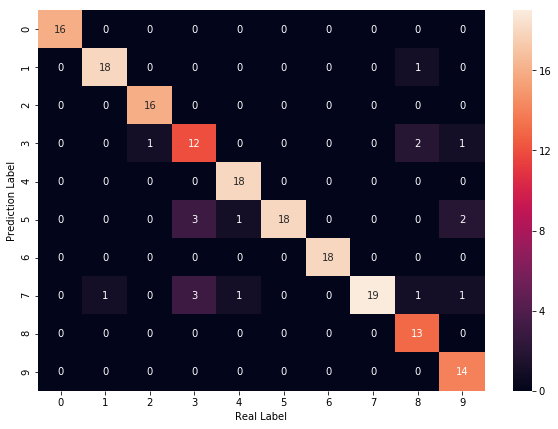

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 19., 16., 16., 18., 24., 18., 26., 13., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:156 index:[5] real:5
#1 min_error:162 index:[3] real:2
#2 min_error:174 index:[1 8] real:8
#3 min_error:50 index:[0] real:0
#4 min_error:113 index:[1] real:1
#5 min_error:93 index:[7] real:7
#6 min_error:70 index:[6] real:6
#7 min_error:117 index:[3] real:3
#8 min_error:70 index:[2] real:2
#9 min_error:119 index:[1] real:1
#10 min_error:154 index:[7] real:7
#11 min_error:182 index:[7] real:4
#12 min_error:78 index:[6] real:6
#13 min_error:113 index:[3] real:3
#14 min_error:112 index:[1] real:1
#15 min_error:147 index:[3] real:3
#16 min_error:149 index:[7] real:9
#17 min_error:106 index:[1] real:1
#18 min_error:136 index:[7] real:7
#19 min_error:53 index:[6] real:6
#20 min_error:149 index:[8] real:8
#21 min_error:90 index:[4] real:4
#22 min_error:106 index:[3] real:3
#23 min_error:124 index:[1] real:1
#24 min_error:89 index:[4] real:4
#25 min_error:72 index:[0] real:0
#26 min_error:113 index:[5] real:5
#27 min_error:94 index:[3] real:3
#28 min_error:105 index:[6] real:6
#29

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8705 Total connections::8674


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8979591836734694
Avg Base Learner:0.7825694946186978
